In [1]:
from IPython.display import display
from process_api import process_api
from process_api.modules.data import DataModule
import os

DataModule.register(process_api)
source = os.path.abspath(os.path.join(os.getcwd(), "../data", "pokemon.csv"))

df = await process_api.call("data", "load", {
    "name": "pokemon",
    "source": source
})

2023-10-09 12:35:46,031 - matplotlib - DEBUG - matplotlib data path: F:\intent_projects\py_process\venv\lib\site-packages\matplotlib\mpl-data
2023-10-09 12:35:46,038 - matplotlib - DEBUG - CONFIGDIR=C:\Users\Johan\.matplotlib
2023-10-09 12:35:46,039 - matplotlib - DEBUG - interactive is False
2023-10-09 12:35:46,040 - matplotlib - DEBUG - platform is win32
2023-10-09 12:35:46,120 - matplotlib - DEBUG - CACHEDIR=C:\Users\Johan\.matplotlib
2023-10-09 12:35:46,123 - matplotlib.font_manager - DEBUG - Using fontManager instance from C:\Users\Johan\.matplotlib\fontlist-v330.json


## Get the data that is in the cache

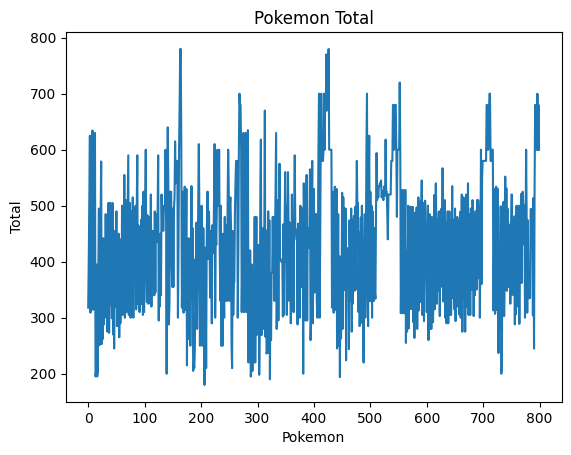

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
result = await process_api.call("data", "get", {
    "name": "pokemon"
})

await process_api.call("data", "plot", {
    "name": "pokemon",
    "field": "Total",
    "title": "Pokemon Total",
    "xlabel": "Pokemon",
    "ylabel": "Total",
    "file": "C:\\temp\\pokemon_total.png"
})

display(result)

## Call a padas method.
In this case we call the head function to get us the top 5 records in the datastore for the pokemon dataset.

In [ ]:
result = await process_api.call("data", "call", {
    "name": "pokemon",
    "method": "head"
})

display(result)


## Get a perspective of the data

A perspective is build using sorting, filtering can also include grouping with aggregation

In [ ]:
result = await process_api.call("data", "get_perspective", {
    "name": "pokemon",
    "perspective": {
        "filter": "`Attack` gt 100 and `Defense` gt 100",
        "sort": {
            "Attack": "dec",
            "Name": "asc"
        }
    }
})

display(result)